In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from typing import Any

matplotlibColors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [2]:
def extractRunNameFromJson(fileName: str) -> str:
    fileName = fileName.removeprefix("logs_fit_")
    fileName = fileName.removesuffix("_train.json")
    fileName = fileName.removesuffix("_validation.json")
    return fileName

#### Histogram - Number of images per identity to number of identies

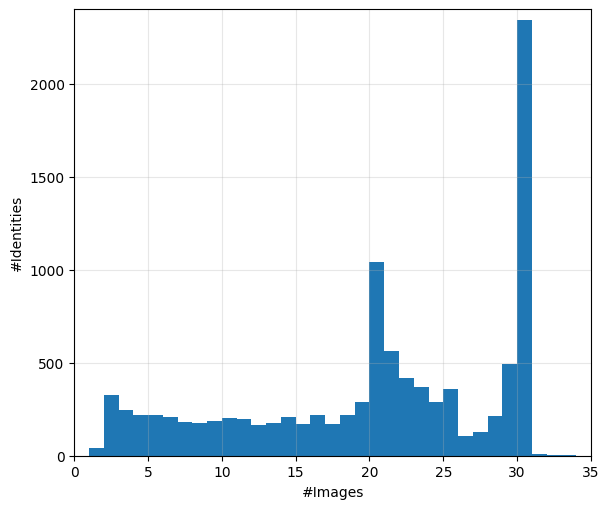

In [4]:
metadata = pd.read_csv("../data_meta/img_align_celeba/identity_CelebA.txt", delim_whitespace=True, names=["filename", "identity"])
metadata_grouped = metadata.groupby("identity")['filename'].apply(list).reset_index(name='filename')
tempCount = metadata_grouped['filename'].str.len()
metadata_grouped_cleaned = metadata_grouped.drop(metadata_grouped[tempCount < 2].index)

fig, ax = plt.subplots()

ax.hist(tempCount, bins=range(1,35))
ax.set_xlim([0, 35])
ax.set_ylim([0, 2400])
ax.figure.set_size_inches([6, 5])
plt.tight_layout()
ax.set_xlabel("#Images")
ax.set_ylabel("#Identities")
ax.grid(alpha=0.3)

### train and val accuracy Triplet

In [10]:
TripletAllBasePath = "../graphs/data/TripletAll/"
jsonLogFilesTripletAll = os.listdir(TripletAllBasePath)

In [11]:
maskFaceTrain = dict()
maskFaceValidation = dict()
for jsonLogFile in jsonLogFilesTripletAll:
    if jsonLogFile.__contains__("train"):
        maskFaceTrain[extractRunNameFromJson(jsonLogFile)] = pd.read_json(
            TripletAllBasePath + jsonLogFile
        )
    elif jsonLogFile.__contains__("validation"):
        maskFaceValidation[extractRunNameFromJson(jsonLogFile)] = pd.read_json(
            TripletAllBasePath + jsonLogFile
        )

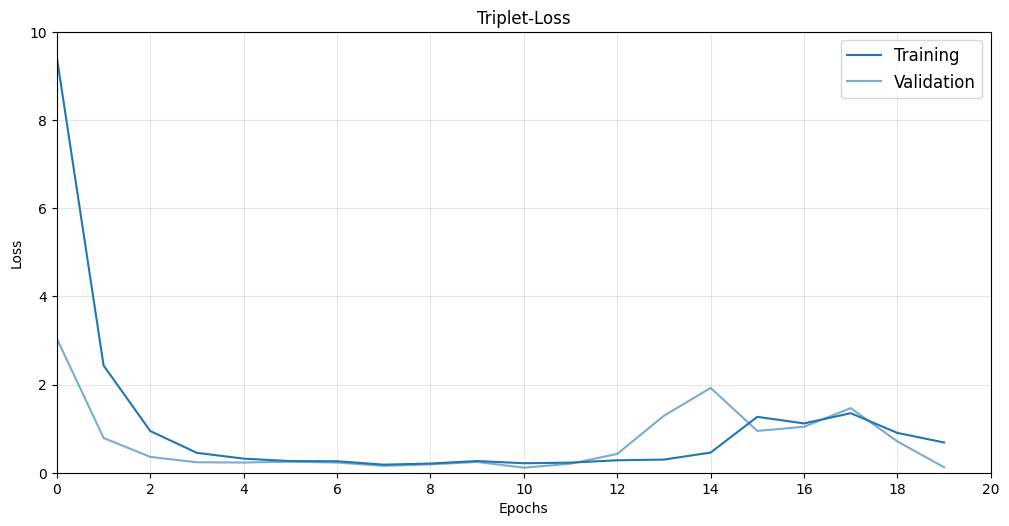

In [12]:
fig, ax = plt.subplots()
ax.plot(
    maskFaceTrain["fit_Siamese_MobileNetV1_Train5000_All"][1],
    maskFaceTrain["fit_Siamese_MobileNetV1_Train5000_All"][2],
    label="Training",
)

ax.plot(
    maskFaceValidation["fit_Siamese_MobileNetV1_Train5000_All"][1],
    maskFaceValidation["fit_Siamese_MobileNetV1_Train5000_All"][2],
    label="Validation",
    alpha=0.6,
    color=matplotlibColors[0],
)

ax.set_xlim([0, 20])
ax.set_ylim([0, 10])
ax.set_xticks(range(0,21,2))
ax.figure.set_size_inches([10, 5])
plt.tight_layout()
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Triplet-Loss")
ax.grid(alpha=0.3)
ax.legend(loc="upper right", prop={'size': 12})

### Train and Validation accuracy pair

In [13]:
TripletAllBasePath = "../graphs/data/Pair/"
jsonLogFilesTripletAll = os.listdir(TripletAllBasePath)

maskFaceTrain = dict()
maskFaceValidation = dict()
for jsonLogFile in jsonLogFilesTripletAll:
    if jsonLogFile.__contains__("train"):
        maskFaceTrain[extractRunNameFromJson(jsonLogFile)] = pd.read_json(
            TripletAllBasePath + jsonLogFile
        )
    elif jsonLogFile.__contains__("validation"):
        maskFaceValidation[extractRunNameFromJson(jsonLogFile)] = pd.read_json(
            TripletAllBasePath + jsonLogFile
        )

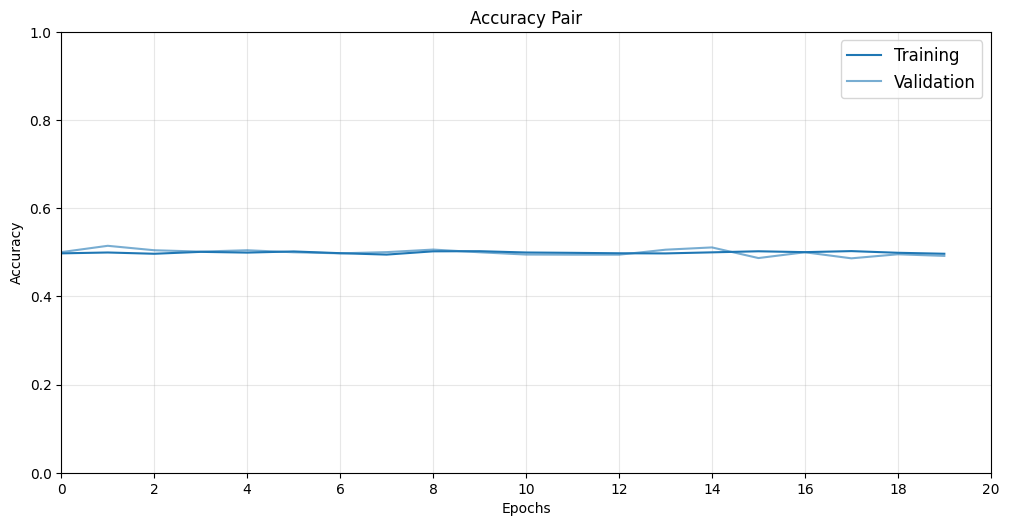

In [14]:
fig, ax = plt.subplots()
ax.plot(
    maskFaceTrain["fit_Siamese_MobileNetV1_Pairs_Train500_All_E20"][1],
    maskFaceTrain["fit_Siamese_MobileNetV1_Pairs_Train500_All_E20"][2],
    label="Training",
)

ax.plot(
    maskFaceValidation["fit_Siamese_MobileNetV1_Pairs_Train500_All_E20"][1],
    maskFaceValidation["fit_Siamese_MobileNetV1_Pairs_Train500_All_E20"][2],
    label="Validation",
    alpha=0.6,
    color=matplotlibColors[0],
)

ax.set_xlim([0, 20])
ax.set_ylim([0, 1])
ax.set_xticks(range(0,21,2))
ax.figure.set_size_inches([10, 5])
plt.tight_layout()
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy Pair")
ax.grid(alpha=0.3)
ax.legend(loc="upper right", prop={'size': 12})

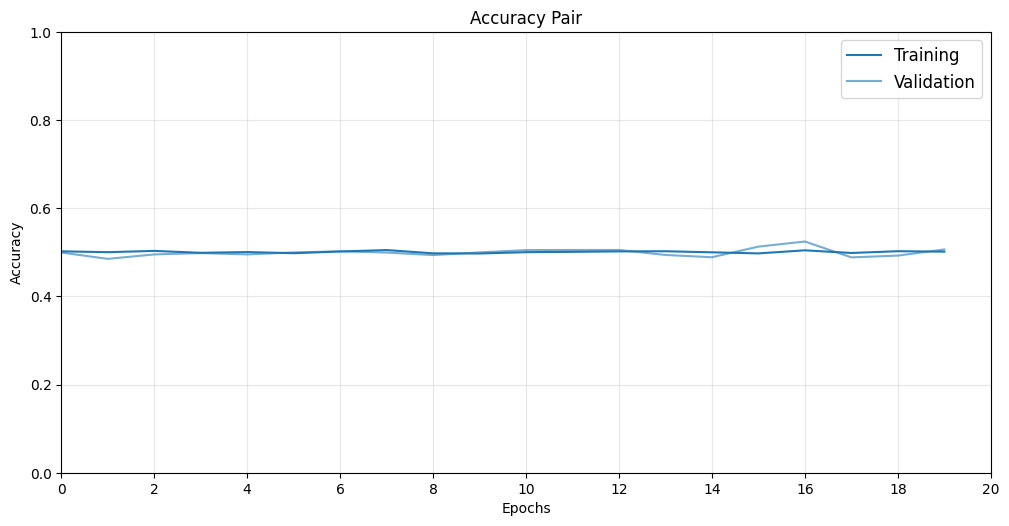

In [15]:
fig, ax = plt.subplots()
ax.plot(
    maskFaceTrain["fit_Siamese_MobileNetV1_Pairs_Train500_Crop_All_E20"][1],
    maskFaceTrain["fit_Siamese_MobileNetV1_Pairs_Train500_Crop_All_E20"][2],
    label="Training",
)

ax.plot(
    maskFaceValidation["fit_Siamese_MobileNetV1_Pairs_Train500_Crop_All_E20"][1],
    maskFaceValidation["fit_Siamese_MobileNetV1_Pairs_Train500_Crop_All_E20"][2],
    label="Validation",
    alpha=0.6,
    color=matplotlibColors[0],
)

ax.set_xlim([0, 20])
ax.set_ylim([0, 1])
ax.set_xticks(range(0,21,2))
ax.figure.set_size_inches([10, 5])
plt.tight_layout()
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy Pair")
ax.grid(alpha=0.3)
ax.legend(loc="upper right", prop={'size': 12})